In [2]:
# IMplementing a Market Basket Analysis using the Apriori Algorithm
# https://www.geeksforgeeks.org/apriori-algorithm/
# https://en.wikipedia.org/wiki/Apriori_algorithm

# read transactions
df_groceries <- read.csv("C:/Users/kgtrm/Documents/R projects data/Groceries_dataset.csv")
str(df_groceries)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : int  1808 2552 2300 1187 3037 4941 4501 3803 2762 4119 ...
 $ Date           : chr  "21-07-2015" "05-01-2015" "19-09-2015" "12-12-2015" ...
 $ itemDescription: chr  "tropical fruit" "whole milk" "pip fruit" "other vegetables" ...


In [3]:
df_sorted <- df_groceries[order(df_groceries$Member_number),]

In [4]:
# convert member number to numeric and item description to categorical
df_sorted$Member_number <- as.numeric(df_sorted$Member_number)

df_sorted$itemDescription <- as.factor(df_sorted$itemDescription)

str(df_sorted)

'data.frame':	38765 obs. of  3 variables:
 $ Member_number  : num  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 ...
 $ Date           : chr  "27-05-2015" "24-07-2015" "15-03-2015" "25-11-2015" ...
 $ itemDescription: Factor w/ 167 levels "abrasive cleaner",..: 138 19 130 130 165 165 108 92 132 72 ...


In [5]:
# convert dataframe to transaction format using ddply
# first need to unload a package

if(sessionInfo()['basePkgs']=="dplyr" | sessionInfo()['otherPkgs']=="dplyr") {
    detach(package:dplyr, unload = TRUE)
}

In [6]:
# group all items that were brought together
# by same customer on the same date
library(plyr)

In [7]:
df_itemList <- ddply(df_groceries, c("Member_number", "Date"), function(df1)paste(df1$itemDescription, collapse = ","))
str(df_itemList)

'data.frame':	14963 obs. of  3 variables:
 $ Member_number: int  1000 1000 1000 1000 1000 1001 1001 1001 1001 1001 ...
 $ Date         : chr  "15-03-2015" "24-06-2014" "24-07-2015" "25-11-2015" ...
 $ V1           : chr  "sausage,whole milk,semi-finished bread,yogurt" "whole milk,pastry,salty snack" "canned beer,misc. beverages" "sausage,hygiene articles" ...


In [9]:
# remove member number and date
df_itemList$Member_number <- NULL
df_itemList$Date <- NULL
str(df_itemList)

'data.frame':	14963 obs. of  1 variable:
 $ V1: chr  "sausage,whole milk,semi-finished bread,yogurt" "whole milk,pastry,salty snack" "canned beer,misc. beverages" "sausage,hygiene articles" ...


In [10]:
colnames(df_itemList) <- c("itemList")

In [11]:
# write to csv format
write.csv(df_itemList, "C:/Users/kgtrm/Documents/R projects data/ItemList.csv",
         quote = FALSE, row.names = TRUE)

In [13]:
# association rule mining algorithm: apriori
# the idea is we find the groups that occur often
# e.g., people buy milk, eggs, and butter together frequently
library(arules)

Loading required package: Matrix


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




In [14]:
# convert the csv file to basket format
txn <- read.transactions(file = "C:/Users/kgtrm/Documents/R projects data/ItemList.csv",
                        rm.duplicates = FALSE, format = "basket", sep = ",", cols = 1)
str(txn)

Warning message in asMethod(object):
"removing duplicated items in transactions"


Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:38007] 75 130 132 165 166 105 128 165 18 92 ...
  .. .. ..@ p       : int [1:14965] 0 1 5 8 10 12 14 16 19 21 ...
  .. .. ..@ Dim     : int [1:2] 168 14964
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	168 obs. of  1 variable:
  .. ..$ labels: chr [1:168] "abrasive cleaner" "artif. sweetener" "baby cosmetics" "bags" ...
  ..@ itemsetInfo:'data.frame':	14964 obs. of  1 variable:
  .. ..$ transactionID: chr [1:14964] "" "1" "2" "3" ...


In [15]:
# remove '\"' and '""' from the transactions 
txn@itemInfo$labels <- gsub("\"", "", txn@itemInfo$labels)

In [16]:
# run the apriori algorithm
basket_rules <- apriori(txn, 
                        parameter = list(minlen = 2, 
                                         sup = 0.001,
                                         conf = 0.01,
                                         target = "rules"))
# basket_rules <- apriori(txn, 
#                         parameter = list(minlen = 2, 
#                                          sup = 0.00001,
#                                          conf = 0.01,
#                                          target = "rules"),
#                         appearance = list(lhs = "CLEMENTINES"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[168 item(s), 14964 transaction(s)] done [0.00s].
sorting and recoding items ... [149 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1186 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [18]:
# check if tm is attached, if yes, then detach
if(sessionInfo()['basePkgs']=="tm" | sessionInfo()['otherPkgs']=="tm"){
  detach(package:sentiment, unload=TRUE)
  detach(package:tm, unload=TRUE)
}

In [19]:
# view the rules
inspect(basket_rules)

       lhs                              rhs                         support    
[1]    {frozen fish}                 => {whole milk}                0.001069233
[2]    {seasonal products}           => {rolls/buns}                0.001002406
[3]    {pot plants}                  => {other vegetables}          0.001002406
[4]    {pot plants}                  => {whole milk}                0.001002406
[5]    {pasta}                       => {whole milk}                0.001069233
[6]    {pickled vegetables}          => {whole milk}                0.001002406
[7]    {packaged fruit/vegetables}   => {rolls/buns}                0.001202887
[8]    {rolls/buns}                  => {packaged fruit/vegetables} 0.001202887
[9]    {detergent}                   => {yogurt}                    0.001069233
[10]   {yogurt}                      => {detergent}                 0.001069233
[11]   {detergent}                   => {rolls/buns}                0.001002406
[12]   {detergent}                   => 

In [28]:
# convert to dataframe and view

df_basket <- as(basket_rules, "data.frame")

df_basket$confidence <- df_basket$confidence * 100
df_basket$support <- df_basket$support * nrow(df)

# str(df_basket_1)

# not working but it said it was optional so oh well

ERROR: Error in `$<-.data.frame`(`*tmp*`, support, value = numeric(0)): replacement has 0 rows, data has 1186


In [24]:
# Mining rules for recommendations:

# split lhs and rhs into two columns
library(reshape2)

In [27]:
df_basket <- transform(df_basket, rules = colsplit(rules, pattern = "=>", names = c("lhs", "rhs")))

# remove curly brackets around rules
df_basket$rules$lhs <- gsub("[[punct:]]", "", df_basket$rules$lhs)
df_basket$rules$rhs <- gsub("[[punct:]]", "", df_basket$rules$rhs)

# convert to character
df_nbasket$rules$lhs <- as.character(df_basket$rules$lhs)
df_nbasket$rules$rhs <- as.character(df_basket$rules$rhs)

# also not working for same reason as above

ERROR: Error in transform(df_basket, rules = colsplit(rules, pattern = "=>", : object 'df_basket' not found


In [29]:
library(stringi)
library(dplyr)
df_basket$rules %>%
  filter(stri_detect_fixed(lhs, "yogurt")) %>%
  select(rhs)

# not working again


Attaching package: 'dplyr'


The following objects are masked from 'package:arules':

    intersect, recode, setdiff, setequal, union


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




ERROR: Error in UseMethod("filter"): no applicable method for 'filter' applied to an object of class "character"


To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



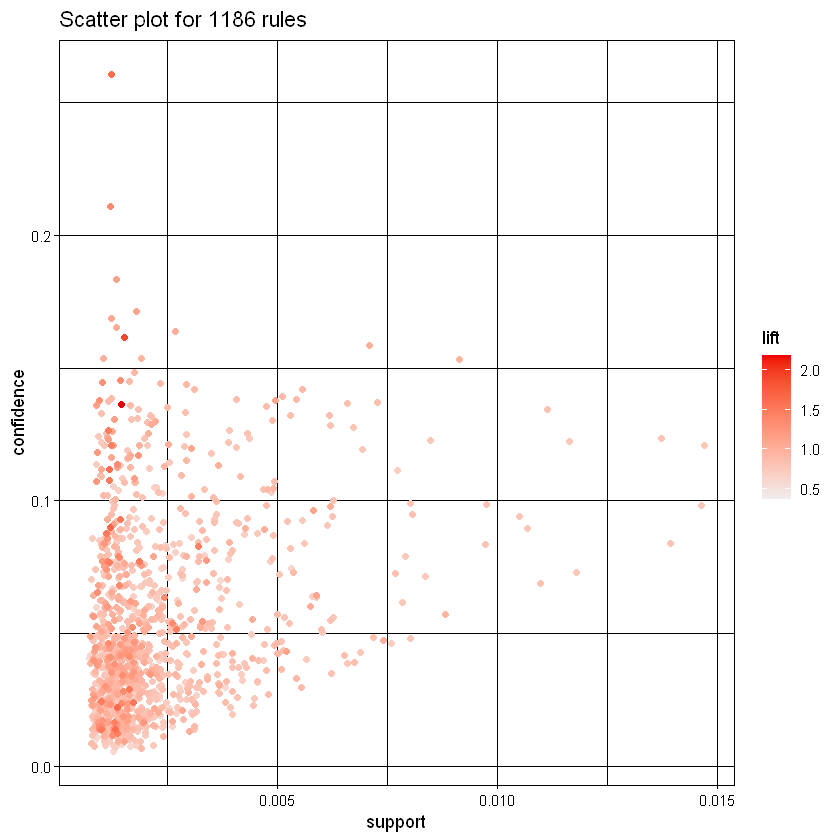

In [32]:
# plot the rules
library(arulesViz)
plot(basket_rules)

Warning message:
"Unknown control parameters: type"


Available control parameters (with default values):
layout	 =  list(fun = function (graph, dim = 2, ...)  {     if ("layout" %in% graph_attr_names(graph)) {         lay <- graph_attr(graph, "layout")         if (is.function(lay)) {             lay(graph, ...)         }         else {             lay         }     }     else if (all(c("x", "y") %in% vertex_attr_names(graph))) {         if ("z" %in% vertex_attr_names(graph)) {             cbind(V(graph)$x, V(graph)$y, V(graph)$z)         }         else {             cbind(V(graph)$x, V(graph)$y)         }     }     else if (vcount(graph) < 1000) {         layout_with_fr(graph, dim = dim, ...)     }     else {         layout_with_drl(graph, dim = dim, ...)     } }, call_str = "layout_nicely(<graph>, )", args = list())
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


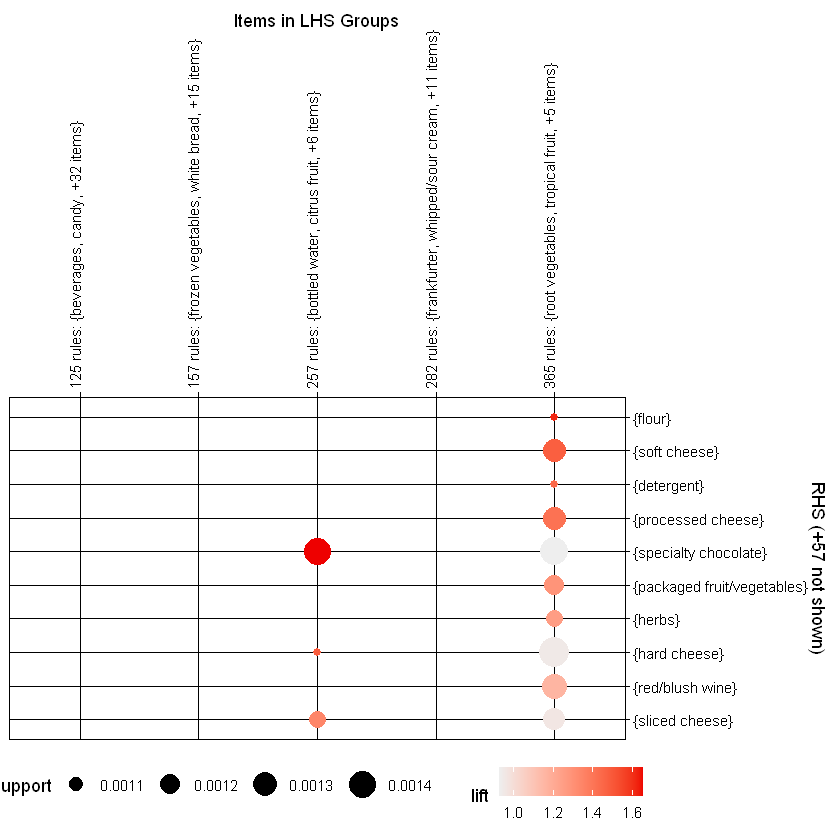

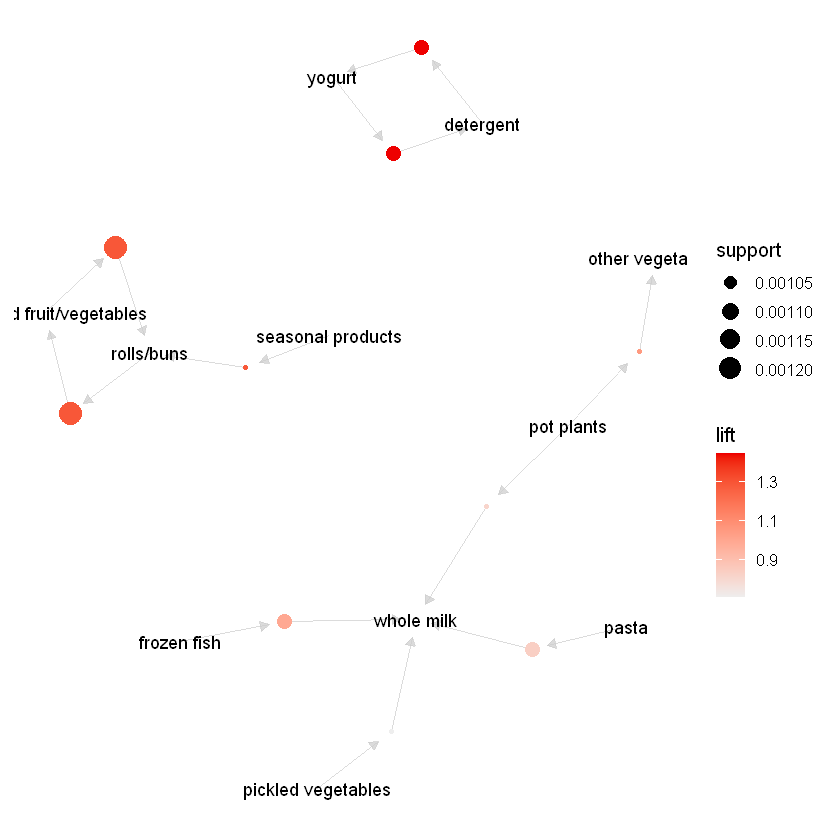

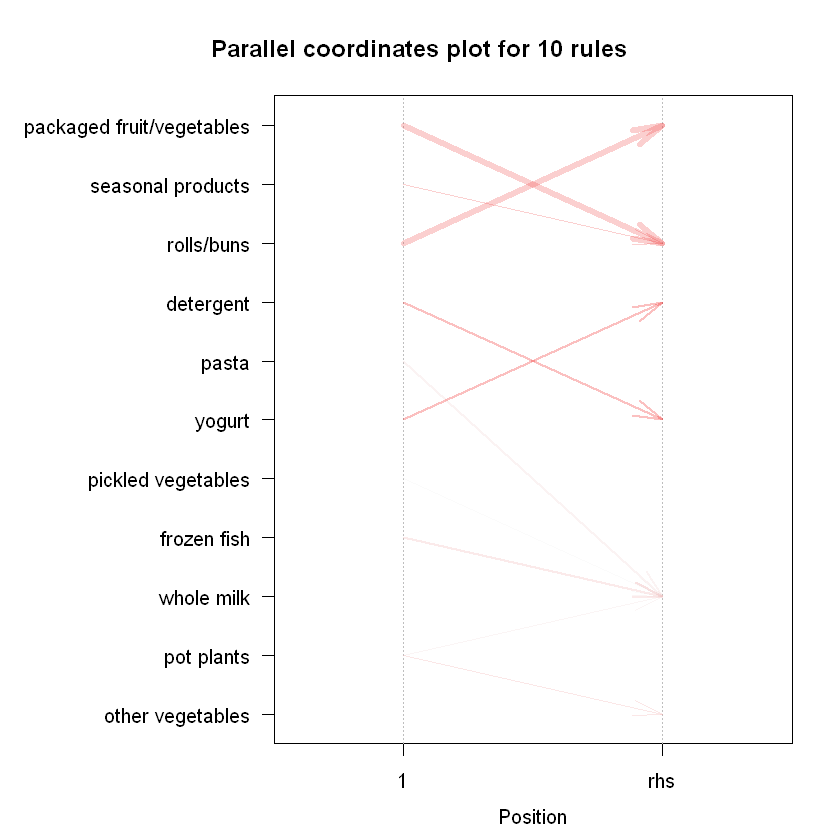

Warning message in plot.rules(basket_rules[1:10, ], measure = c("support", "lift"), :
"The parameter interactive is deprecated. Use engine='interactive' instead."
To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



Interactive mode.
Select a region with two clicks!


ERROR: Error in upgradeUnit.default(x): Not a unit object


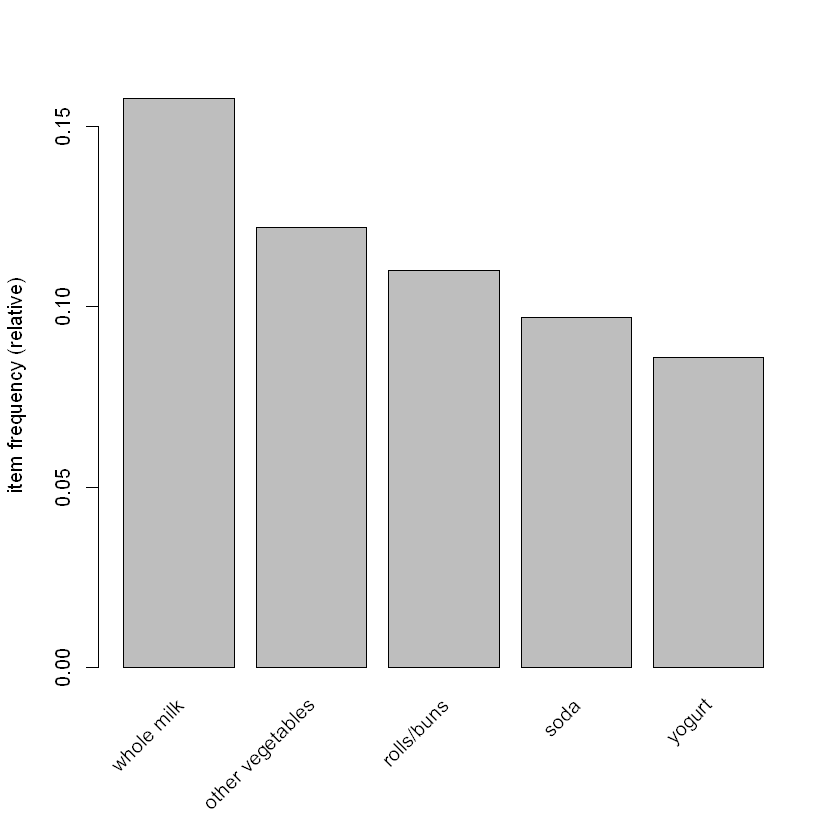

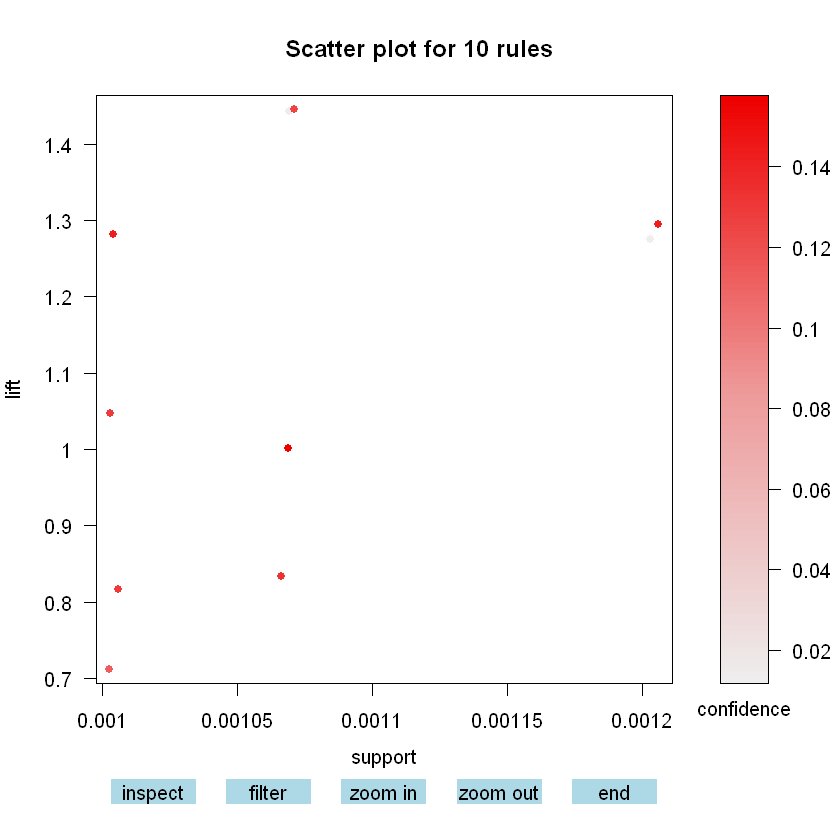

In [33]:
set.seed(8000)
plot(basket_rules, method = "grouped", control = list(k = 5))

plot(basket_rules[1:10,], method="graph", control=list(type="items"))

plot(basket_rules[1:10,], method="paracoord",  control=list(alpha=.5, reorder=TRUE))

itemFrequencyPlot(txn, topN = 5)

plot(basket_rules[1:10,],measure=c("support","lift"),shading="confidence",interactive=T)

# some of this didn't work but most of this is way over my head so I didn't worry too much about it